Transformación de la variable pronósticada en regresión con TransformedTargetRegressor
===

Uso básico con funciones de usuario
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

#
# Generación de la muestra de datos
#
X, y = make_regression(
    n_samples=300,
    n_features=1,
    n_targets=1,
    bias=150,
    noise=9.0,
    shuffle=False,
    random_state=123456,
)

argsort = argsort(np.X[:, 0])
X = X[argsort]
y = y[argsort]

y = np.exp(0.01 * y)

In [2]:
#
# Definición de una transformación simple
#
def target_transformer(x):
    return np.log(x)


def inverse_target_transformer(x):
    return np.exp(x)

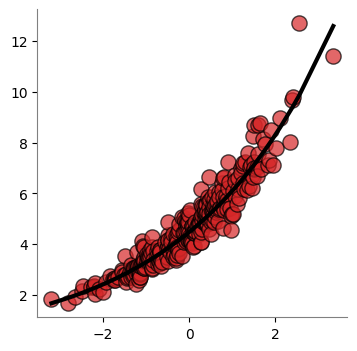

In [3]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

regressor = TransformedTargetRegressor(
    # -------------------------------------------------------------------------
    # Regressor object
    regressor=linearRegression,
    # -------------------------------------------------------------------------
    # Advanced custom transformer (not considered here)
    transformer=None,
    # -------------------------------------------------------------------------
    # Function to apply to y before passing to fit.
    func=target_transformer,
    # -------------------------------------------------------------------------
    # Function to apply to the prediction of the regressor.
    inverse_func=inverse_target_transformer,
)

regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.figure(figsize=(4, 4))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [4]:
#
# Fitted regressor.
#
regressor.regressor_

LinearRegression()

Uso con pipelines
----

In [5]:
#
# Generación de la muestra de datos
#
X, y = make_regression(
    n_samples=500,
    n_features=5,
    n_informative=1,
    n_targets=1,
    bias=400,
    noise=7.0,
    shuffle=False,
    random_state=12345,
)

argsort = np.argsort(X[:, 0])
X = X[argsort, :]
y = y[argsort]

y = np.exp(0.01 * y)

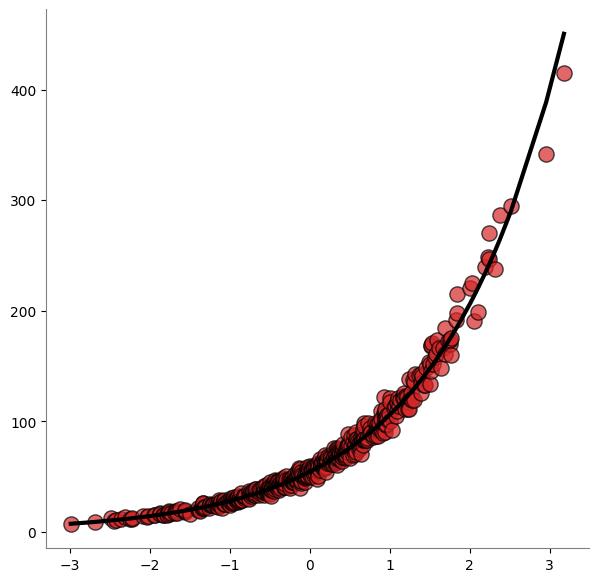

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[
        ("selectKBest", SelectKBest(f_regression)),
        ("linearRegression", LinearRegression()),
    ]
)


transformedTargetRegressor = TransformedTargetRegressor(
    regressor=pipeline,
    func=target_transformer,
    inverse_func=inverse_target_transformer,
)

param_grid = {
    "regressor__selectKBest__k": [1, 2, 3, 4, 5],
}


gridSearchCV = GridSearchCV(
    estimator=transformedTargetRegressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
)


gridSearchCV.fit(X, y)

y_pred = gridSearchCV.predict(X)

plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [7]:
gridSearchCV.best_params_

{'regressor__selectKBest__k': 1}